In [1]:
#@title
from IPython.display import display, Math, HTML
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import random
import warnings
from math import *
warnings.filterwarnings('ignore') # setting ignore as a parameter
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (5,5)
display(HTML("<h1>Л/Р №2, Степанов Илья, группа М32321</h1>"))
def matrix(x):
    s = "\\left(" \
        "\\begin{array}{c}"
    for i in x:
        s += str(i) + "\\\\"
    s += "\\end{array}" \
         "\\right)"
    return s

def beautiful_matrix(points):
    s = ""
    for i in range(len(points)):
        if i % 4 == 0:
            if i != 0:
                s += "\\rightarrow"
        s += matrix(points[i])
        if i != len(points) - 1:
            s += "\\rightarrow"
        if i % 4 == 3 or i == len(points) - 1:
            display(Math(s))
            display(HTML("<br>"))
            s = ""

def beautiful_function_2(a, b):
    if len(a) <= 3:
        s = 'F('
        for i in range(len(a)):
            s += 'x_' + str(i) + ', '
        s = s[:-2] + ') = '
    else:
        s = 'F(x_0, x_1, ..., x_{' + str(len(a)-1) + '}) ='
    for i in range(len(a)):
        if a[i] == 0:
            continue
        elif a[i] < 0:
            s += ' - '
        elif i != 0:
            s += ' + '
        if abs(a[i]) != 1:
            s += str(abs(a[i]))
        if b[i] != 0:
            s += '(x_{' + str(i) + '}'
            if b[i] < 0:
                s += ' - '
            else:
                s += ' + '
            s += str(b[i]) + ')'
        else:
            s += 'x_{' + str(i) + '}'
        s += '^2'
    if s[-2] + s[-1] == "= ":
        s += "0"
    display(Math(s))

def beautiful_function(b, i=""):
    s = 'F_{' + str(i) +'}(x_0, x_{' + str(len(b) - 1) + '}) ='
    for i in range(len(b)-1):
        if b[i] == 0 or isnan(b[i]):
            continue
        elif b[i] < 0:
            s += ' - '
        elif i != 0:
            s += ' + '
        if abs(b[i]) != 1:
            s += '(' + str(abs(b[i])) + ')'
        s += 'x_{' + str(i) + '}'
    if b[-1] > 0 and s[-2] + s[-1] != "= ":
        s += "+ (" + str(b[-1]) + ')'
    elif b[i-1] < 0:
        s += "- (" + str(abs(b[-1])) + ')'
    if s[-2] + s[-1] == " =" and isnan(b[0]):
        s += ' ?'
    if s[-2] + s[-1] == " =":
        s += " 0"
    display(Math(s))


# Точность измерений минимума
epsilon = 0.001
display(HTML("<h3>Точность измерений минимума: " + str(epsilon) + "</h3>"))

In [ ]:
#@title
display(HTML('''<h2>1. Реализуйте стохастический градиентный спуск для решения линейной регрессии. <br>Исследуйте 
    сходимость с разным размером батча (1 - SGD, 2, .., n − 1 - Minibatch GD, n - GD из предыдущей работы):</h2>'''))
#@title
display(HTML("<h2>2. Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость, например экспоненциальную или ступенчатую.:</h2>"))

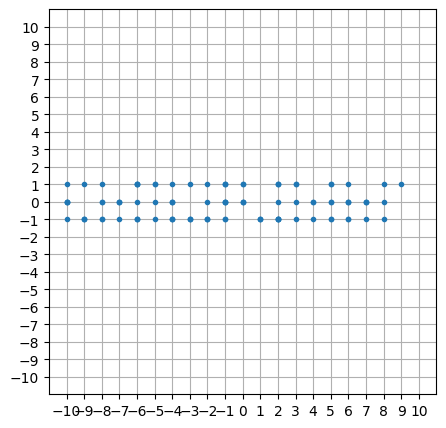

In [ ]:
def f(b, x):
    # f(x) = b[n+1] + (b1 b2 ... bn)*(x1 x2 x3 ... xn)T
    result = b[-1]
    for i in range(len(x)):
        result += b[i] * x[i]
    return result


def ERR(b, x, y):
    result = 0
    for xi, yi in zip(x, y):
        print('\t', xi, yi)
        result += (f(b, xi) - yi)**2
    return result


def grad(b, x, y):
    result = np.zeros(len(b))
    for i in range(len(b)-1):
        result[i] = sum([2*xi[i]*(f(b, xi) - yi) for xi, yi in zip(x, y)])
    result[-1] = sum([2*(f(b, xi) - yi) for xi, yi in zip(x, y)])
    return np.array(result)


def exp_lr(init_lr, decay_rate, t):
    return init_lr*np.exp(-decay_rate*t)


def grad_desc(b, x, y, epoch, batch_size, decay_rate=None):
    n = len(x[0]) # Размерность пространства
    points = np.zeros((epoch, n+1))
    points[0] = b
    init_lr = 0.001
    for i in range(1, epoch):
        if decay_rate:
            lr = exp_lr(init_lr, decay_rate, i)
        else:
            lr = init_lr
        batch = random.sample(range(0, len(x)), batch_size)
        x_batch = [x[k] for k in batch]
        y_batch = [y[k] for k in batch]
        b = b - lr * grad(b, x_batch, y_batch)
        points[i] = b
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return points[:i], b, i


x = np.random.randint(-10, 10, (100, 1))
y = np.random.randint(-1, 2, (100, 1))


ax = plt.figure().add_subplot()
ax.set_xlim([-11, 11])
ax.set_ylim([-11, 11])
ax.set_xticks(np.arange(-10, 11, 1))
ax.set_yticks(np.arange(-10, 11, 1))


ax.plot(x, y, ".")
ax.grid()

display(HTML('<h3>Количество точек: ' + str(len(x)) + ' <br>Сгенерированные точки: </h3>'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

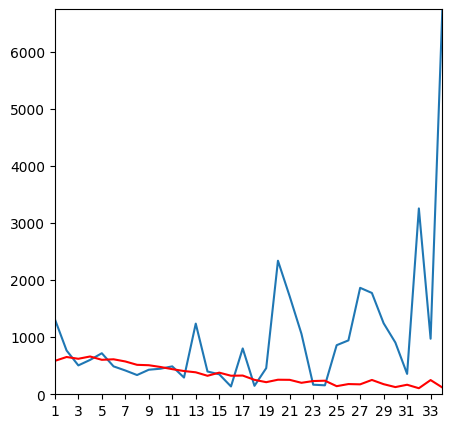

In [ ]:
display(HTML('<h3> Разные размеры батча: </h3>'))
decay_rate = 0.006
b0 = np.random.randint(-100, 100, 2)
count = []
count_exp = []
for size in range(1, len(x)):
    points, b, iteration = grad_desc(b0, x, y, 10000, size)
    b = b.round(int(np.log10(1/epsilon)))
    if (iteration == 9999):
        break
    beautiful_function(b, size)
    count.append(iteration)

    points, b, iteration = grad_desc(b0, x, y, 10000, size, decay_rate)
    b = b.round(int(np.log10(1/epsilon)))
    if (iteration == 9999):
        break
    beautiful_function(b, "exp\;" + str(size))
    count_exp.append(iteration)
    print()


ax = plt.figure().add_subplot()
ax.set_xlim([1, max(len(count), len(count_exp))])
ax.set_ylim([0, max(count + count_exp)+10])
ax.set_xticks(np.arange(1, max(len(count), len(count_exp))+1, 2))

ax.plot([0] + count)
ax.plot([0] + count_exp, 'r')
batch = count.index(min(count))+1
# HTML("<p>Постоянный lr - наилучшая сходимость при размере батча:" + str(batch) + "<br>Количество итераций:" + str(count[batch-1]) + "</p>" + 
#      "<p>Экспоненциальный lr (decay_rate = " + str(decay_rate) + ") - сходимость при размере батча:" + str(batch) + "<br>Количество итераций:" + str(count_exp[batch-1]) + "</p>")

In [ ]:
display(HTML("<h2>3. Исследуйте модификации градиентного спуска (Nesterov, Momentum, AdaGrad, RMSProp, Adam):</h2>"))

In [ ]:
def f(vector, a, b=None):
    if b is None:
        b = np.zeros(len(vector))
    result = 0
    for i in range(len(vector)):
      if type(vector[0]) is np.ndarray:
        result += a[i] * (vector[i] + b[i]) ** 2
      else:
        result += a[i] * (vector[i] + b[i]) ** 2
    return result

def grad(point, a, b=None):
    if b is None:
        b = np.zeros(len(point))
    result = np.zeros(len(point))
    for i in range(len(point)):
        result[i] = 2 * a[i] * (point[i] + b[i])
    return np.array(result)

def update_gd(type, x, lamb, lr, epoch, a, b=None):
    global epsilon
    n = len(a) # Размерность пространства
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    v = 0
    for i in range(1, epoch):
        if type == 'nesterov':
            v = lamb * v + lr * grad(x - lamb * v, a, b)
        elif type == 'momentum':
            v = lamb * v + lr * grad(x, a, b)
        x = x - v
        count += 1
        points[i] = x
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return count, points[:i+1]


def adagrad(x, alpha, eps, epoch, a, b=None):
    global epsilon
    n = len(a)
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    G = 0
    for i in range(1, epoch):
        g = grad(x, a, b)
        G += np.matmul(g, g)
        lr = alpha/(np.sqrt(G + eps))
        x = x - lr * g
        count += 1
        points[i] = x
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return count, points[:i+1]

def rmsprop(x, alpha, eps, lamb, epoch, a, b=None):
    global epsilon
    n = len(a)
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    G = 0
    for i in range(1, epoch):
        g = grad(x, a, b)
        G = lamb * G + (1-lamb)*np.matmul(g, g)
        lr = alpha/(np.sqrt(G + eps))
        x = x - lr * g
        count += 1
        points[i] = x
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return count, points[:i+1]
    
def adam(x, alpha, beta, epoch, a, b=None):
    global epsilon
    n = len(a)
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    m = 0
    v = 0
    eps = 1e-8
    for i in range(1, epoch):
        g = grad(x, a, b)
        m = alpha * m + (1 - alpha) * g
        v = beta * v + (1 - beta) * np.matmul(g, g)

        v_hat = v / (1 - beta**i)
        m_hat = m / (1 - alpha**i)

        lr = alpha/(np.sqrt(v_hat + eps))
        x = x - lr * m_hat
        count += 1
        points[i] = x
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return count, points[:i+1]

In [ ]:
display(HTML('''<h2>4. Исследуйте сходимость алгоритмов. Сравнить различные методы по скорости
сходимости, надежности, требуемым машинным ресурсам (объем оперативной
памяти, количеству арифметических операций, времени выполнения):</h2>'''))

In [ ]:
display(HTML('''<h2>5. Постройте траекторию спуска различных алгоритмов из одной и той же исходной точки с одинаковой точностью. В отчете наложить эту траекторию на
рисунок с линиями равного уровня заданной функции:</h2>'''))

<IPython.core.display.Math object>

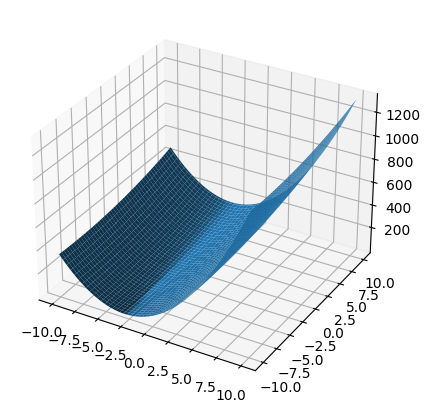

In [ ]:
display(HTML("<h2>3.1. Квадратичная функция:</h2>"))
a = [7, 0.5]
b = [3, 7]
beautiful_function_2(a, b)

epsilon = 0.01

t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), a, b))
print("", end="")

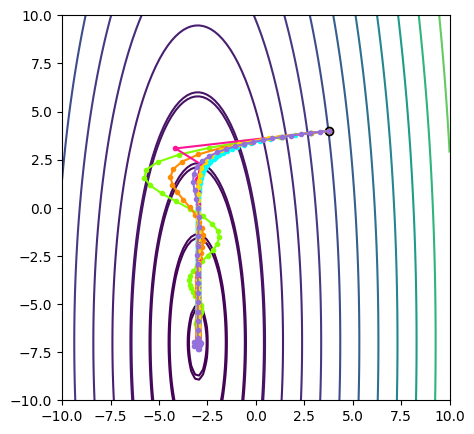

In [ ]:
#@title
points = [[-3, k] for k in np.linspace(-20, 50, 20)]
plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
# x = np.random.uniform(-10, 10, 2)
x = np.array([3.8, 4])

# STANDART 
display(HTML("<h2 style=\"color: aqua\">Standart grad. desc. :</h2>"))
count, points = update_gd('momentum', x, 0, 0.01, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="aqua")
plt.plot(x[0], x[1], 'o', color="k")



# MOMENTUM
display(HTML("<h2 style=\"color: chartreuse\">Momentum grad. desc. :</h2>"))
count, points = update_gd('momentum', x, 0.8, 0.01, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="chartreuse")



# NESTEROV
display(HTML("<h2 style=\"color: darkorange\">Nesterov grad. desc. :</h2>"))
count, points = update_gd('nesterov', x, 0.8, 0.01, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="darkorange")



# ADAGRAD
display(HTML("<h2 style=\"color: deeppink\">AdaGrad:</h2>"))
count, points = adagrad(x, 8, 1e-8, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="deeppink")



# RMSProp
display(HTML("<h2 style=\"color: gold\">RMSProp:</h2>"))
count, points = rmsprop(x, 1, 1e-8, 0.9, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="gold")



# Adam
display(HTML("<h2 style=\"color: mediumpurple\">Adam:</h2>"))
count, points = adam(x, 0.5, 0.5, 1000, a, b)
# beautiful_matrix([x] + [points[-1]])

display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
display(HTML("<h3>Точность найденного минимума: " + str(round(max(abs(points[-1] - [-3, -7])), 3)) + "</h3>"))
plt.plot(points[:, 0], points[:, 1], '.-', color="mediumpurple")

print(end="")

In [3]:
display(HTML('''<h2>Бонус.(1, 2, 3). Реализуйте полиномиальную регрессию. Постройте графики восстановленной регрессии для полиномов разной степени:</h2>'''))

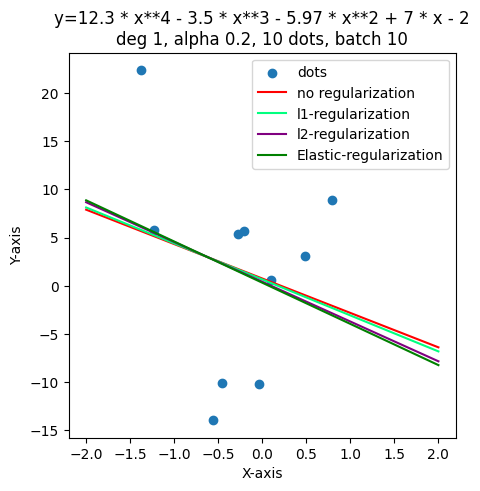

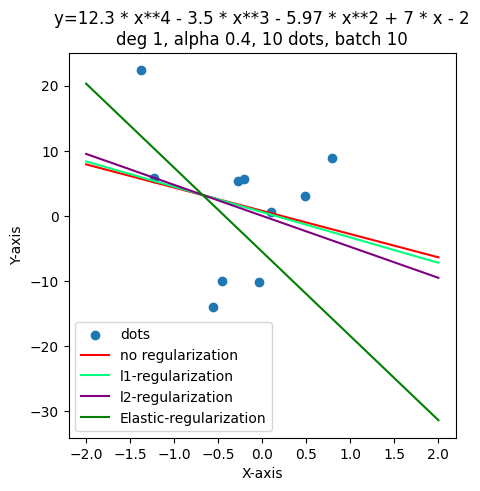

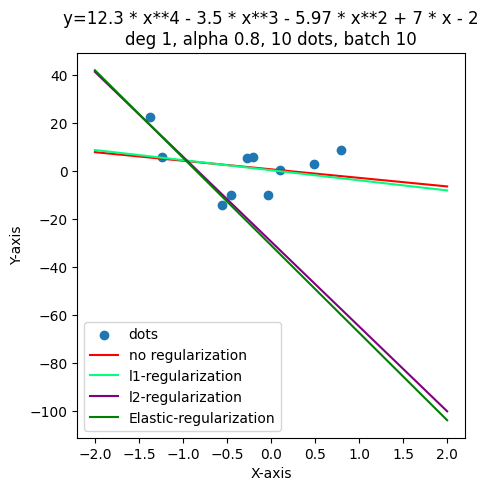

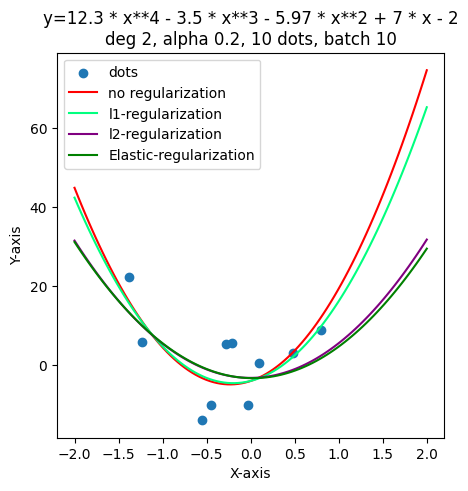

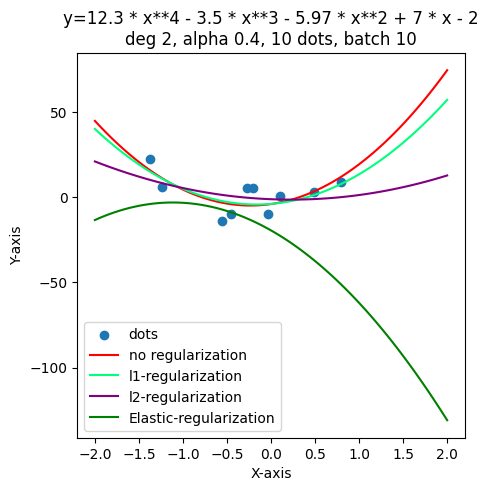

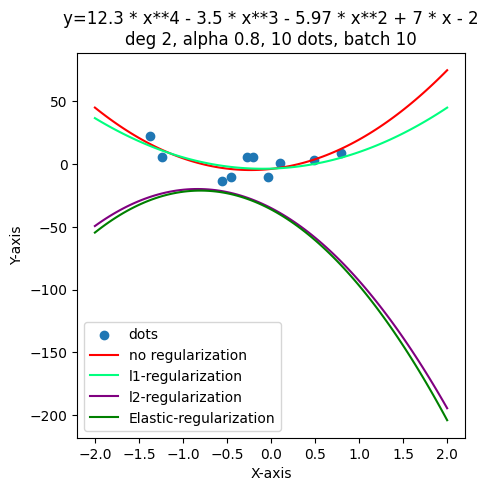

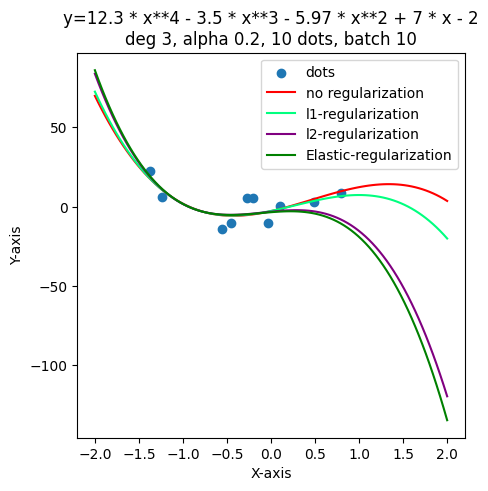

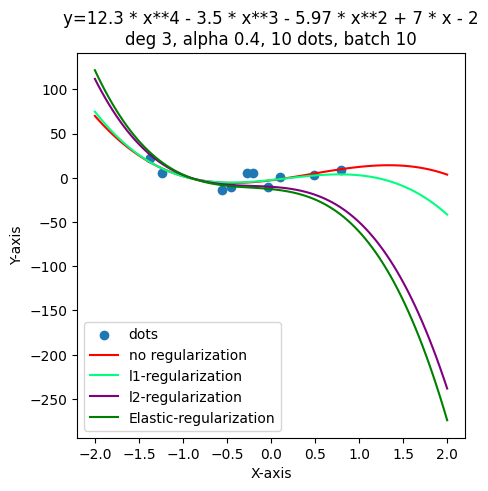

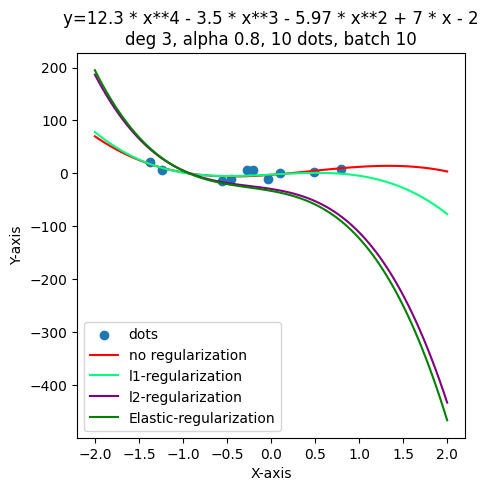

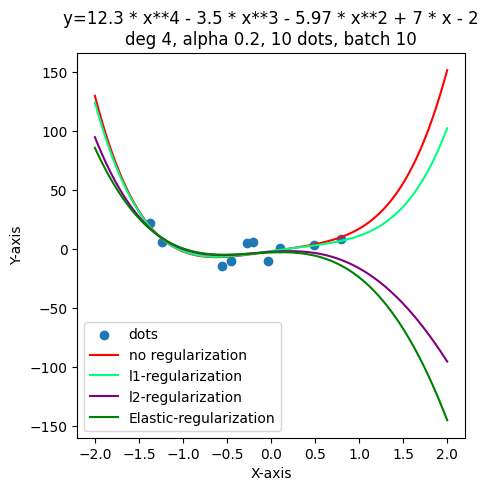

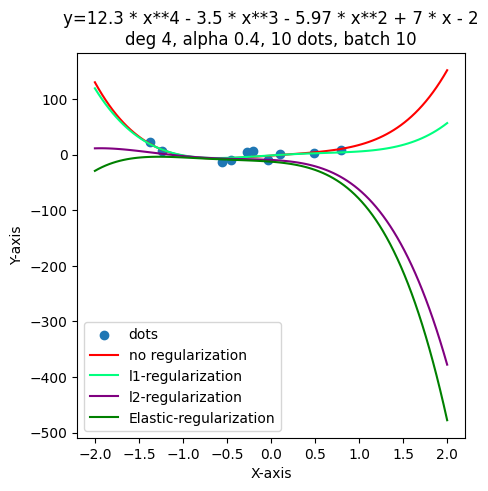

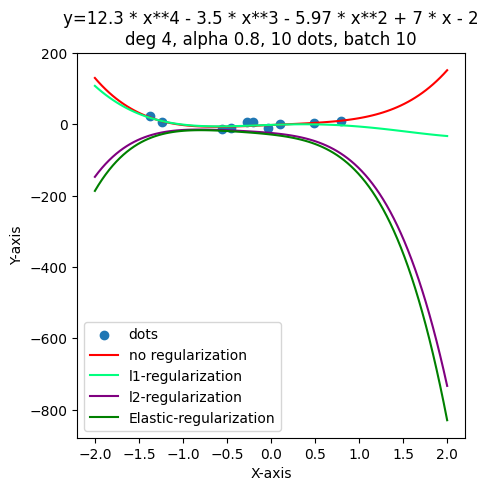

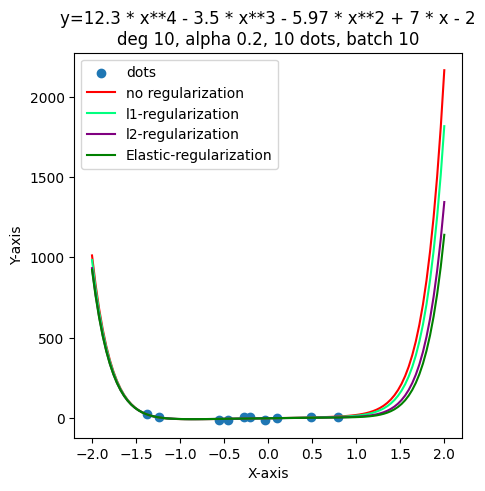

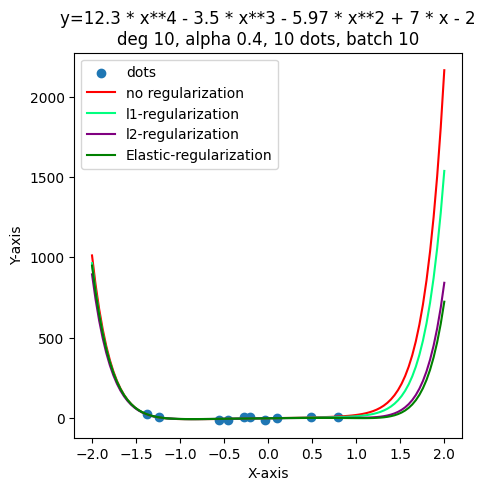

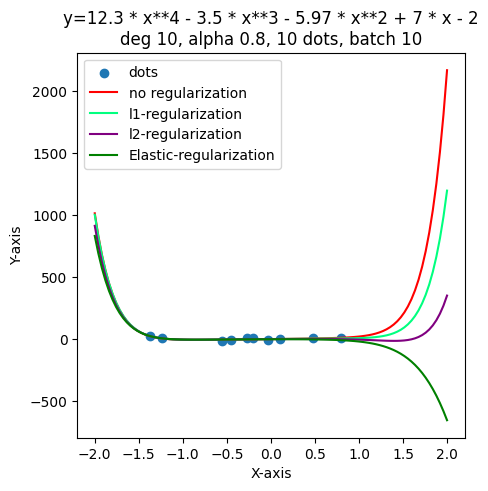

In [4]:
from math import ceil
from functools import reduce
from prettytable import PrettyTable

def l1_reg(w, L):
    return L * np.sum(np.abs(w))

def l2_reg(w, L):
    return L * np.sum(w ** 2)

def elastic_reg(w, l1, l2):
    return l1_reg(w, l1) + l2_reg(w, l2)


def stochastic_gd(w: np.array, x: np.array, y: np.array,
                  ll, regularization=None, batch=100,
                  lr=0.5, gamma_m=0.9, gamma_v=0.999, epsilon=1e-8, brk=1e-3, epoch=60):
    
    n_samples = x.size
    n_batches = ceil(n_samples / batch)
    iterations = 0
    history = [w]
    steps_history = np.zeros((n_batches, w.shape[0]))
    momentum = np.zeros(w.shape)
    velocity = np.zeros(w.shape)
    
    def get_batch_indexes(batch_idx):
        start = batch_idx * batch
        end = min((batch_idx + 1) * batch, n_samples)
        return np.arange(start, end)
    
    def get_gradient(w, batch_indexes):
        gradient = np.zeros_like(w)
        for i in batch_indexes:
            for j in range(len(w)):
                gradient[j] += ((sum([w[q] * x[i] ** q for q in range(len(w))]) - y[i])
                                * (x[i] ** j))
        gradient *= 2/n_samples
        if regularization is not None:
            gradient += regularization(w, *ll)/n_samples
        return gradient
    
    def update_weights(w, gradient, momentum, batch_idx):
        nonlocal velocity, iterations
        iterations += 1
        momentum = gamma_m * momentum + (1 - gamma_m) * gradient
        velocity = gamma_v * velocity + (1 - gamma_v) * gradient ** 2
        momentum_hat = momentum / (1 - gamma_m ** iterations)
        velocity_hat = velocity / (1 - gamma_v ** iterations)
        step = lr * momentum_hat / (np.sqrt(velocity_hat) + epsilon)
        if batch_idx < n_batches:
            steps_history[batch_idx] = np.abs(step)
        return w - step, momentum
    
    for _ in range(1, epoch + 1):
      random_batch_indexes = np.random.permutation(n_batches)
      for batch_idx in reduce(lambda x, y: x+y, map(get_batch_indexes, random_batch_indexes)):
          gradient = get_gradient(w, get_batch_indexes(batch_idx))
          w, momentum = update_weights(w, gradient, momentum, batch_idx)
          history.append(w)
          if np.sum(steps_history[:-1]) / n_batches < brk:
              break

    return np.array(history), iterations


def generate_points(f, num, max_x=2, disp=0):
    X = np.random.uniform(low=-max_x, high=max_x, size=num)
    X.sort()
    Y = f(X)
    for i in range(len(Y)):
        Y[i] = Y[i] + random.uniform(-10, 10)
    return X, Y


def bonus(f_name, regression, dots):
    X, Y = generate_points(regression, dots)
    colors = ['red', 'springgreen', 'purple', 'green', 'orange', 'violet']
    regs = [None, l1_reg, l2_reg, elastic_reg]
    regs_names = ['no regularization', 'l1-regularization', 'l2-regularization', 'Elastic-regularization']
    regs_names.insert(0, 'dots')
    values = [
        (i, batch, lam)
        for i in [1, 2, 3, 4, 10]
        for batch in [dots]
        for lam in [0.2, 0.4, 0.8]
    ]
    for i, batch, lam in values:
        l1, l2 = lam, lam
        regs_params = [[], [l1], [l2], [l1, l2]]
        W0 = np.ones(i+1)
        plt.scatter(X, Y)
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        wss = [str(i), str(lam)]
        for j, reg in enumerate(regs):
            WW, it = stochastic_gd(W0, X, Y, ll=regs_params[j], regularization=reg, batch=batch)
            W = WW[-1]

            def apply_coeffs(x):
                return sum([(x ** q) * W[q] for q in range(len(W))])

            def summ(ww):
                return sum([
                    (sum([ww[q] * X[k] ** q for q in range(len(ww))]) - Y[k])**2 for k in range(X.size)
                 ])

            loss = summ(W)
            wss.append(str([round(loss), round(sum([abs(_) for _ in W])),
                            round(min([abs(_) for _ in W]))]))
            coeffs = np.linspace(-2, 2, 100)
            apply_res = apply_coeffs(coeffs)
            plt.plot(coeffs, apply_res, color=colors[j])
        plt.title(f_name + '\ndeg ' + str(i) + ', alpha ' + str(lam) + ', ' + str(dots) + ' dots, batch '
                  + str(batch))
        plt.legend(regs_names)
        plt.show()


def reg(x):
    return 12.3 * x**4 - 3.5 * x**3 - 5.97 * x**2 + 7 * x - 2


bonus('y=12.3 * x**4 - 3.5 * x**3 - 5.97 * x**2 + 7 * x - 2', reg, dots=10)

Выводы (Бонус):

В экспериментах было продемонстрировано влияние разных методов регуляризации на производительность моделей линейной регрессии при предсказании значений целевой переменной на тестовых данных.

Без регуляризации модель переобучалась на тренировочных данных и плохо справлялась с предсказанием на тестовых данных.

L1-регуляризация позволяет выбрать только наиболее значимые признаки, что приводит к улучшению качества предсказаний на тестовых данных.

L2-регуляризация также борется с переобучением, но сохраняет все признаки.

Elastic является чем-то средним по оптимальности между L1 и L2 регуляризациями.

Использование полиномиальных признаков позволяет достичь более точных предсказаний на тестовых данных, но также может возникнуть риск переобучения.

Выбор оптимального значения коэффициента регуляризации является важным фактором для достижения наилучшей производительности модели. Слишком большое значение коэффициента может привести к недообучению, а слишком маленькое - к переобучению.